In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import string
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
df = pd.read_csv('Data/BA_reviews.csv')

In [135]:
df.head()

,Unnamed: 0,reviews
0,0,"✅ Trip Verified | I had a flight from Miami, F..."
1,1,✅ Trip Verified | We started our day with BA ...
2,2,✅ Trip Verified | I fly British Airways weekl...
3,3,Not Verified | Everything was ok until our co...
4,4,Not Verified | My initial flight was cancelle...


In [136]:
print(df.columns)

Index(['Unnamed: 0', 'reviews'], dtype='object')


In [137]:
# Correctly seperate the verification and reviews columns

df['Verification'], df['reviews'] = df['reviews'].str.split('|', 1).str

print(df)

     Unnamed: 0                                            reviews  \
0             0   I had a flight from Miami, Florida to Dublin,...   
1             1    We started our day with BA in Prague. The fl...   
2             2    I fly British Airways weekly not because I w...   
3             3    Everything was ok until our connecting fligh...   
4             4    My initial flight was cancelled 8 hours prio...   
..          ...                                                ...   
995         995    Phoenix to Accra via London. I had a great C...   
996         996    Manchester to London. The bag drop process t...   
997         997    San Diego to Hannover via London. I booked o...   
998         998    London Heathrow to Stuttgart. Absolutely dis...   
999         999    London to Johannesburg. Turning right to the...   

         Verification  
0    ✅ Trip Verified   
1    ✅ Trip Verified   
2    ✅ Trip Verified   
3       Not Verified   
4       Not Verified   
..             

C:\Users\peter\AppData\Local\Temp\ipykernel_33552\28650722.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Verification'], df['reviews'] = df['reviews'].str.split('|', 1).str
C:\Users\peter\AppData\Local\Temp\ipykernel_33552\28650722.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Verification'], df['reviews'] = df['reviews'].str.split('|', 1).str


In [139]:
# Renaming Columns to be more suitable
df.columns = ['Customer', 'Review', 'Verification']

In [140]:
# Only including trips which have been verified
verified_df = df[df['Verification'].str.contains('Trip Verified', na=False)]

In [142]:
# Removing punctuation from reviews

verified_df['Review'] = verified_df['Review'].str.replace('[^\w\s]','')
print(verified_df['Review'])

0       I had a flight from Miami Florida to Dublin I...
1        We started our day with BA in Prague The fli...
2        I fly British Airways weekly not because I w...
6       Check in and security clearance very quick at...
8       Worst BA experience I was supposed to fly out...
                             ...                        
995      Phoenix to Accra via London I had a great Cu...
996      Manchester to London The bag drop process to...
997      San Diego to Hannover via London I booked on...
998      London Heathrow to Stuttgart Absolutely disg...
999      London to Johannesburg Turning right to the ...
Name: Review, Length: 791, dtype: object


C:\Users\peter\AppData\Local\Temp\ipykernel_33552\2408231062.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  verified_df['Review'] = verified_df['Review'].str.replace('[^\w\s]','')
C:\Users\peter\AppData\Local\Temp\ipykernel_33552\2408231062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_df['Review'] = verified_df['Review'].str.replace('[^\w\s]','')


In [143]:
# tokenizing reviews 

print(verified_df.iloc[1,1])
verified_df['Review'] = verified_df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)
print(verified_df.iloc[0,1])

  We started our day with BA in Prague The flight actually left on time I came to find out thats very unusual We purchased business class seats As you can see from the picture they hardly were business class All they did was block off the middle seat in the first few rows and called it business class Horrible flight In addition I had a really rude rude check in clerk basically yell at me when I excused myself and asked if she could give a little bit of priority to the many business class passengers who werent being served Then we got to Heathrow and the real fun began We had a 4 hour delay They gave us about 5 different excuses for the delay I had a few employees walk away while I was asking them questions They were very rude At one point there were no employees left And from the announcements it seems virtually every BA flight was delayed And there were no weather issues There was no place to comfortably store items in business class Ive never experienced that before Not even a cup ho

C:\Users\peter\AppData\Local\Temp\ipykernel_33552\3902514558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_df['Review'] = verified_df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)


In [144]:
# Removing stop words 
verified_df['Review'] = verified_df['Review'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(verified_df.head(20))

    Customer                                             Review  \
0          0  I flight Miami Florida Dublin Ireland via Lond...   
1          1  We started day BA Prague The flight actually l...   
2          2  I fly British Airways weekly I want route ther...   
6          6  Check security clearance quick LHR T5 My wife ...   
8          8  Worst BA experience I supposed fly Italy 7 Sep...   
9          9  My daughter I denied boarding business class f...   
10        10  Despite boarding usual free LHR groups 13 call...   
13        13  44 flights booked holiday delayed 12 hours No ...   
14        14  British Airways total lack respect customers I...   
15        15  London Heathrow Keflavik Iceland Business Clas...   
16        16  Mumbai London Heathrow Business Class ageing B...   
17        17  Care support shocking Written previously loyal...   
18        18  Flying A380 business class pleasure BA made di...   
19        19  British Airways absolutely care My reserved se..

C:\Users\peter\AppData\Local\Temp\ipykernel_33552\1472925438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_df['Review'] = verified_df['Review'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))


In [145]:
# Setup sentiment analyser

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [154]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(verified_df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Customer']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [157]:
# Merge results to original dataframe
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Customer'})
vaders = vaders.merge(df, how='left')

In [166]:
# labelling scores positive or negative
def tag_cal(compound):
    if compound<0:
        return 'Negative'
    elif compound>0:
        return 'Positive'
    else:
        return 'Neutral'

vaders['tag'] = vaders['compound'].apply(tag_cal)

In [169]:
vaders.head()

,Customer,neg,neu,pos,compound,Review,Verification,tag
0,0,0.082,0.865,0.053,-0.5603,"I had a flight from Miami, Florida to Dublin,...",✅ Trip Verified,Negative
1,1,0.174,0.792,0.034,-0.9712,We started our day with BA in Prague. The fl...,✅ Trip Verified,Negative
2,2,0.216,0.736,0.048,-0.9424,I fly British Airways weekly not because I w...,✅ Trip Verified,Negative
3,6,0.000,0.787,0.213,0.9206,Check in and security clearance very quick at...,✅ Trip Verified,Positive
4,8,0.081,0.843,0.076,-0.2023,Worst BA experience. I was supposed to fly ou...,✅ Trip Verified,Negative


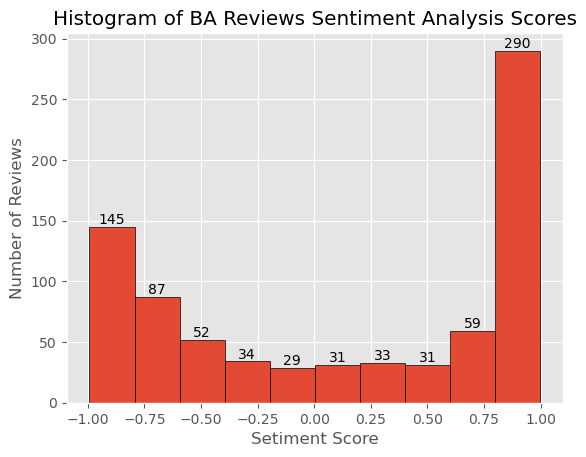

In [178]:
# Create histogram to show spread of sentiment scores

n, bins, patches = plt.hist(vaders['compound'], bins=10, edgecolor='black')  # 'bins' defines the number of intervals

# Add data labels to each column
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2., patches[i].get_height(),
             f'{int(patches[i].get_height())}', ha='center', va='bottom')
    
# Add title and labels
plt.title("Histogram of BA Reviews Sentiment Analysis Scores")
plt.xlabel("Setiment Score")
plt.ylabel("Number of Reviews")

# Show plot
plt.show()

In [171]:
# Get Count of Positive/Negative/Neutral Reviews

count_positive = vaders[vaders['tag'] == 'Positive'].shape[0]

count_negative = vaders[vaders['tag'] == 'Negative'].shape[0]

count_neutral = vaders[vaders['tag'] == 'Neutral'].shape[0]

print(f"Count of Positive Reviews : {count_positive}")
print(f"Count of Negative Reviews : {count_negative}")
print(f"Count of Neutral Reviews : {count_neutral}")

Count of Positive Reviews : 444
Count of Negative Reviews : 342
Count of Neutral Reviews : 5


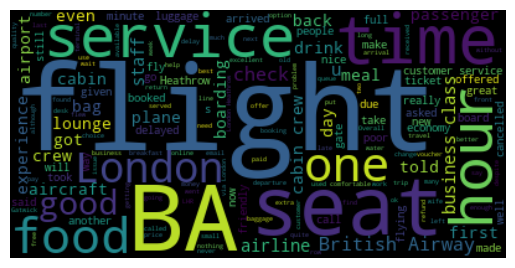

In [176]:
# Produce wordcloud for posotive comments
text_pos = " "
for ind in vaders.index:
    if vaders['tag'][ind] == "Positive":
        text = text + vaders['Review'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

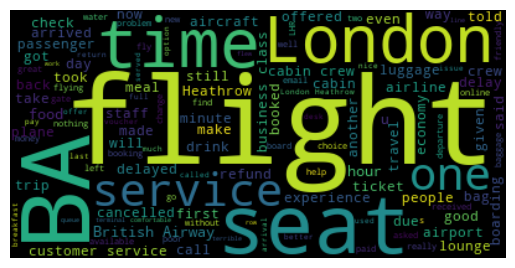

In [177]:
# Produce wordcloud for negative comments

text_neg = " "
for ind in vaders.index:
    if vaders['tag'][ind] == "Negative":
        text = text + vaders['Review'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()